<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-главы-1" data-toc-modified-id="Вывод-главы-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод главы 1</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод-главы-2" data-toc-modified-id="Вывод-главы-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод главы 2</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Выводы-главы-3" data-toc-modified-id="Выводы-главы-3-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы главы 3</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по проекту</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Произведем импорт всех неообходимых библиотек.

In [212]:
import pandas as pd

from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Далее, подгрузим данные и ознакомимся с ними.

In [213]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Отметим, что столбцы: *RowNumber*, *CustomerId*, *Surname* не представляют интереса для обучения модели, так как эти данные носят лишь информационный (идентифицирующий) характер. Их из выборки надо будет позднее удалить.

Так же, необходимо будет преобразовать категориальные данные в столбцах *geography* и *gender* методом OHE, что так же, сделаем позднее.

Ознакомимся с данными по выборке.

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видно, что в столбце *Tenure* имеются пропуски, их необходимо будет заполнить, для этого, посмотрим какие значение есть в данном столбце.

In [215]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Наиболее логичным, будет заполнить пропуски в данных медианным значением столбца. Так и поступим.

In [216]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Теперь, удалим лишние столбцы, которые не дадут дополнительной информации для будующей модели.

In [217]:
data_good = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data_good

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Произведем замену категориальных признаком методом OHE, что бы не попасть в дамми ловушку, будет удалять избыточные стобцы.

In [218]:
data_d = pd.get_dummies(data_good, columns=['Geography', 'Gender'], drop_first=True)
data_d

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


В столбцах *Balance* и *EstimatedSalary* видим большой разброс значений, для более точной работы модели произведем масшитабирование данных признаков.

В конце главы, разобьем исходную выборку на учебную, валидативную и тестовую. В соотношении: 60/20/20.

In [219]:
features = data_d.drop(['Exited'], axis=1)
target = data_d['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                               test_size=0.2, random_state=1234)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train,
                                                                               test_size=0.25, random_state=1234)
print('Тренировочная база:', features_train.shape, target_train.shape)
print('Валидная база:', features_valid.shape, target_valid.shape)
print('Тестовая база:', features_test.shape, target_test.shape)

Тренировочная база: (6000, 11) (6000,)
Валидная база: (2000, 11) (2000,)
Тестовая база: (2000, 11) (2000,)


In [220]:
numeric = ['Balance', 'EstimatedSalary']
pd.options.mode.chained_assignment=None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод главы 1

В данной главе работы была произведена загрузка необзодимых библиотек и вводных данных. Данные были иссследованы, было выявлено, что для дальнейшей работы необходимо было сделать (и было сделано):

1. Заполнить пропуски в столбце *Tenure*;
2. Удалить не информативные для нашей работы столбцы;
3. Произвести масштабирование признаков;
4. Рабить исходную выборку на учебную, валидативную и тестовую.

## Исследование задачи

Выясним, как представлены классы в учебной выборке, считая, что примерно такое же соотношение будет и в других выборках.

In [221]:
print(target_train[target_train==1].count() / target_train[target_train==0].count())

0.25654450261780104


<AxesSubplot:title={'center':'Распределение классов в процентах'}>

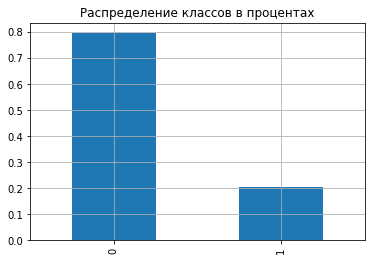

In [222]:
target_train.value_counts(normalize=True).plot(kind='bar', grid=True, title='Распределение классов в процентах')

В соотношение классов присутствует вный дисбаланс. Для более точного предстаказания моделей будет необходимо данные дисбаланс убрать, однако в данный главе мы его проигнорируем и попробуем получить требуемое значение метрики качества модели.

Подготовим ряд функций, для улучшения читаемости кода.

In [223]:
def ar(model, f_valid=features_valid, t_valid=target_valid):
    probabilities_valid = model.predict_proba(f_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(t_valid, probabilities_one_valid)
    return auc_roc

def lern(model, f_train=features_train, t_train=target_train, f_valid=features_valid, t_valid=target_valid):
    model.fit(f_train, t_train)
    f1 = f1_score(t_valid, model.predict(f_valid))
    auc_roc = ar(model)
    return [f1, auc_roc]

Создадим структуру данных, для хранение результатов моделей.

In [224]:
list_score = []
list_model = []

Воспользуемся моделью линейной регресси.

In [225]:
model = LogisticRegression(solver='liblinear', random_state=12345)
score = lern(model)
list_score.append(score)
list_model.append('L_Regression_non_balance')
print('F1:', score[0])
print('Auc_Roc:', score[1])

F1: 0.3175182481751825
Auc_Roc: 0.7577492602284122


Далее, перейдем к модели решающего дерева. Через цикл найдем наиболее оптимальную глубину дерева.

In [226]:
good_f = 0
good_d = 0
good_ar = 0

for depth in range(1,20,1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    score = lern(model)
    
    if score[0] > good_f:
        good_f = score[0]
        good_d = depth
        good_ar = score[1]

print('Лучшая метрика F1', good_f)
print('Лучшая метрика Auc_Roc:', good_ar)
print('Параметры модели - глубина:', good_d)

list_score.append([good_f, good_ar])
list_model.append('Tree_non_balance')

Лучшая метрика F1 0.5660377358490565
Лучшая метрика Auc_Roc: 0.8170998813919934
Параметры модели - глубина: 8


И под конец, модель рандомного леса.

In [227]:
good_f = 0
good_d = 0
good_e = 0
good_ar = 0

for depth in range(1,11,1):
    for est in range(1, 20, 1):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        score = lern(model)
        
        if score[0] > good_f:
            good_f = score[0]
            good_d = depth
            good_e = est
            good_ar = score[1]
            
print('Лучшая метрика F1', good_f)
print('Лучшая метрика Auc_Roc:', good_ar)
print('Параметры модели - глубина и число деревьев:', good_d, good_e)

list_score.append([good_f, good_ar])
list_model.append('Forest_non_balance')

Лучшая метрика F1 0.5800604229607251
Лучшая метрика Auc_Roc: 0.8456521606221419
Параметры модели - глубина и число деревьев: 8 13


### Вывод главы 2

Из работы моделей видно, что при наличии дисбаланса классов получить требуемое значение метрики f1 не представляется возможным. максимальное значение получено для модели случайного леса и равно 0.58 при требуемом минимуме 0.59.

Для достижение цели необходимо учесть дисбаланс классов.

## Борьба с дисбалансом

Дисбаланс классов будем компенсировать двумя способами:

1. Передавать в модели параметр **class_weight='balanced'** для введения веса классов;
2. Прозиведем upsample учебной выборки, получив соотновешие классов примерно 1:1.

Начнём с введения веса для классов.

Первой, обучим модель логической регресии.

In [228]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
score = lern(model)
list_score.append(score)
list_model.append('L_Regression_class_weight')

print('F1:', score[0])
print('Auc_Roc:', score[1])

F1: 0.48555956678700357
Auc_Roc: 0.7629597588711452


Далее, модель решающего дерева.

In [229]:
good_f = 0
good_d = 0
good_ar = 0
for depth in range(1,20,1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    score = lern(model)
    
    if score[0] > good_f:
        good_f = score[0]
        good_d = depth
        good_ar = score[1]
        
print('Лучшая метрика F1', good_f)
print('Лучшая метрика Auc_Roc:', good_ar)
print('Параметры модели - глубина:', good_d)

list_score.append([good_f, good_ar])
list_model.append('Tree_class_weight')

Лучшая метрика F1 0.5853174603174603
Лучшая метрика Auc_Roc: 0.8146543554816463
Параметры модели - глубина: 7


И, наконец, модель случайного леса.

In [230]:
good_f = 0
good_d = 0
good_e = 0
good_ar = 0

for depth in range(1,11,1):
    for est in range(1, 20, 1):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345, class_weight='balanced')
        score = lern(model)
        
        if score[0] > good_f:
            good_f = score[0]
            good_d = depth
            good_e = est
            good_ar = score[1]

print('Лучшая метрика F1', good_f)
print('Лучшая метрика Auc_Roc:', good_ar)
print('Параметры модели - глубина и число деревьев:', good_d, good_e)

list_score.append([good_f, good_ar])
list_model.append('Forest_class_weight')

Лучшая метрика F1 0.616061606160616
Лучшая метрика Auc_Roc: 0.8466953302682741
Параметры модели - глубина и число деревьев: 7 16


Теперь, создадим функцию, которая прозиведет upsample учебной выборки, что бы соотношение классов было примерно 1 к 1.

In [231]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

И теперь обучим все те же модели, но уже без учета веса классов, но по измененным учебным выборкам.

In [232]:
good_f = 0
good_d = 0
good_e = 0
good_ar = 0

for depth in range(1,11,1):
    for est in range(1, 20, 1):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        score = lern(model, f_train=features_upsampled, t_train=target_upsampled)

        if score[0] > good_f:
            good_f = score[0]
            good_d = depth
            good_e = est
            good_ar = score[1]
            
print('Лучшая метрика F1', good_f)
print('Лучшая метрика Auc_Roc:', good_ar)
print('Параметры модели - глубина и число деревьев:', good_d, good_e)

list_score.append([good_f, good_ar])
list_model.append('Forest_upsamle')

Лучшая метрика F1 0.6117908787541713
Лучшая метрика Auc_Roc: 0.8503116517081999
Параметры модели - глубина и число деревьев: 10 19


In [233]:
model = LogisticRegression(solver='liblinear', random_state=12345)
score = lern(model, f_train=features_upsampled, t_train=target_upsampled)

print('F1:', score[0])
print('Auc_Roc:', score[1])

list_score.append(score)
list_model.append('L_Regression_upsample')

F1: 0.48619768477292963
Auc_Roc: 0.7631126042405421


Модели обучены, результаты собраны. Создадим датафрейм с результатами, отсортируем из по величине f1 и тем самым, выберем лучшую модель.

In [234]:
result = pd.DataFrame(list_score, index=list_model, columns=['f1', 'Auc_Roc'])
result.sort_values(by='f1', ascending=False)

,f1,Auc_Roc
Forest_class_weight,0.616062,0.846695
Forest_upsamle,0.611791,0.850312
Tree_class_weight,0.585317,0.814654
Forest_non_balance,0.580060,0.845652
Tree_non_balance,0.566038,0.817100
L_Regression_upsample,0.486198,0.763113
L_Regression_class_weight,0.485560,0.762960
L_Regression_non_balance,0.317518,0.757749


Как видно из таблицы, лучший результат показала модель случайного леса с сбалансированными классами методом upsample и гиперпараметрами: max_depth=10 , n_estimators=14. Тестированию подвергнем именно такую модель с такими параметрами.

### Выводы главы 3

В главе 3 были получены оценки моделей, обученных с учетом дисбаланса классов. Дисбаланс классов нивелировался двумя способаи: придание весов классам и методом upsample. Итоговая таблица позваляет получить представление о качестве моделей с разными параметрами и способами учета дисбаланса классов.

## Тестирование модели

Проведем тестирование модели случайного леса с гиперпараметрами, которые в проглой главе показали наибольшую метрику f1. Обучение модели будет производить на учебной выборке к которой применили метод upsample, для нивелирования дисбаланса классов. Првоерку будем осуществлять на тестовой выборке.

In [235]:
model = RandomForestClassifier(max_depth=10, n_estimators=19, random_state=12345)
score = lern(model, f_train=features_upsampled, t_train=target_upsampled, f_valid=features_test, t_valid=target_test)
print('F1:', score[0])
print('Auc_roc:', score[1])

F1: 0.6024636058230683
Auc_roc: 0.8503116517081999


Минимальной порог метрики пройдет, задание прокта выполнено.

### Выводы по проекту

В ходе работы над проектом, были полученны исходные данные, которые были предварительно обработаны. Предобработка вклачала:

1. Заполнение пропущенных значений медианой.
2. Удаление неинформативных стобцов.
3. Преобразование категориальных данных.
4. Масштабирование признаков.
5. Разбитие изходной выборки на учебную, валидативную и тренировочную.

Далее, был проведет анализ моделей без учета дисбаланса классов. В ходе анализа, было показано, чтоб достичь требуемого порога метрики, не учитывая дисбаланс классов, невозможно.

Следом, были применены два метода нивелирования дисбаланса классов:

1. Придание классам веса;
2. Приведение соотношение классов к значение, близкому как 1 к 1 методом upsample.

В ходе применения методов были обучены модели и свормирована сводная таблица, показывающая значение метрики f1 для всех расмотренных моделей (и их наилучших гиперпараметров). На основе таблицы была выбрана модель (его гиперпараметры и учет дисбаланса классов) с наилучшей метрикой f1.

В конце работы, было проведено тестирование модели - минимальный порог метрики пройден.